In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df=pd.read_csv('./House Price Prediction Dataset.csv')
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [33]:
df.shape


(2000, 10)

In [34]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [35]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


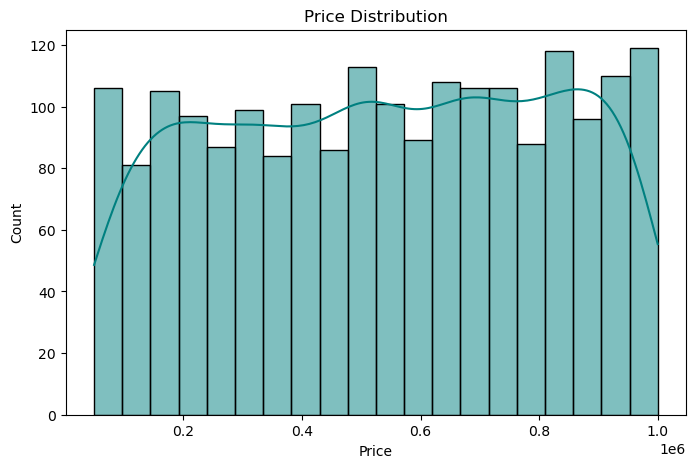

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=20, kde=True, color='teal')
plt.title('Price Distribution')
plt.show()



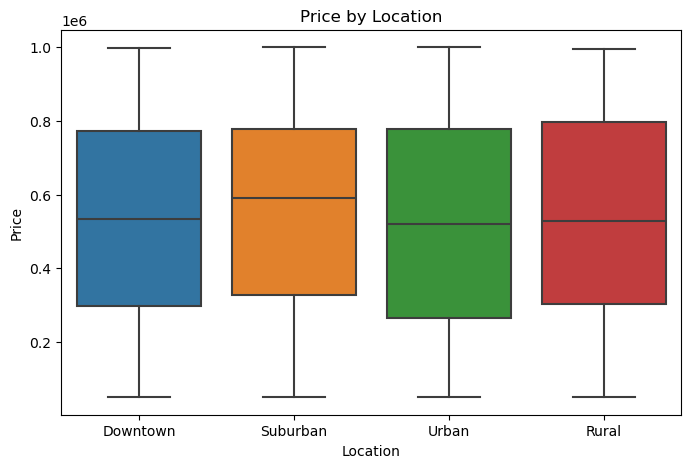

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Price by Location')
plt.show()


In [38]:
df["Condition"].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

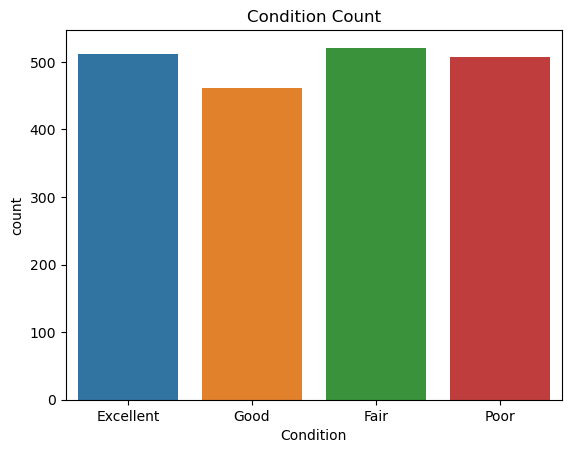

In [39]:
sns.countplot(x = "Condition",data = df)
plt.title("Condition Count")
plt.show()

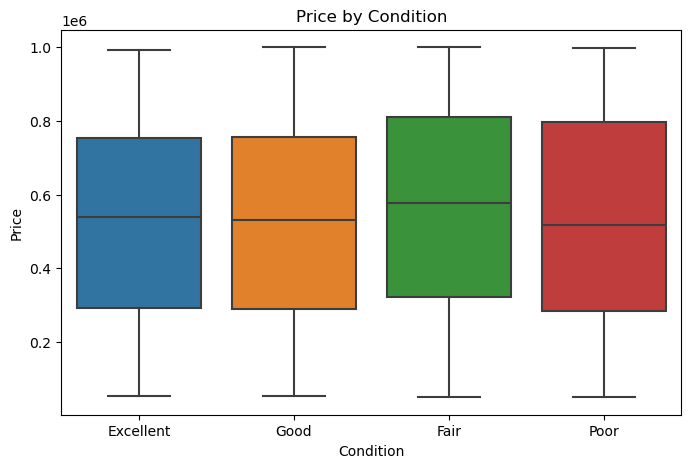

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Condition', y='Price', data=df)
plt.title('Price by Condition')
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
Location_en =  LabelEncoder()
df["Location"] = Location_en.fit_transform(df["Location"])

In [43]:
Condition_en =  LabelEncoder()
df["Condition"] = Condition_en.fit_transform(df["Condition"])

In [44]:
Garage_en =  LabelEncoder()
df["Garage"] = Condition_en.fit_transform(df["Garage"])

In [45]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056


In [46]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [47]:
x = df.drop(columns=['Price'])
y = df["Price"]

In [48]:
x.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1,1360,5,4,3,1970,0,0,0
1,2,4272,5,4,3,1958,0,0,0
2,3,3592,2,2,3,1938,0,2,0
3,4,966,4,2,2,1902,2,1,1
4,5,4926,1,4,2,1975,0,1,1


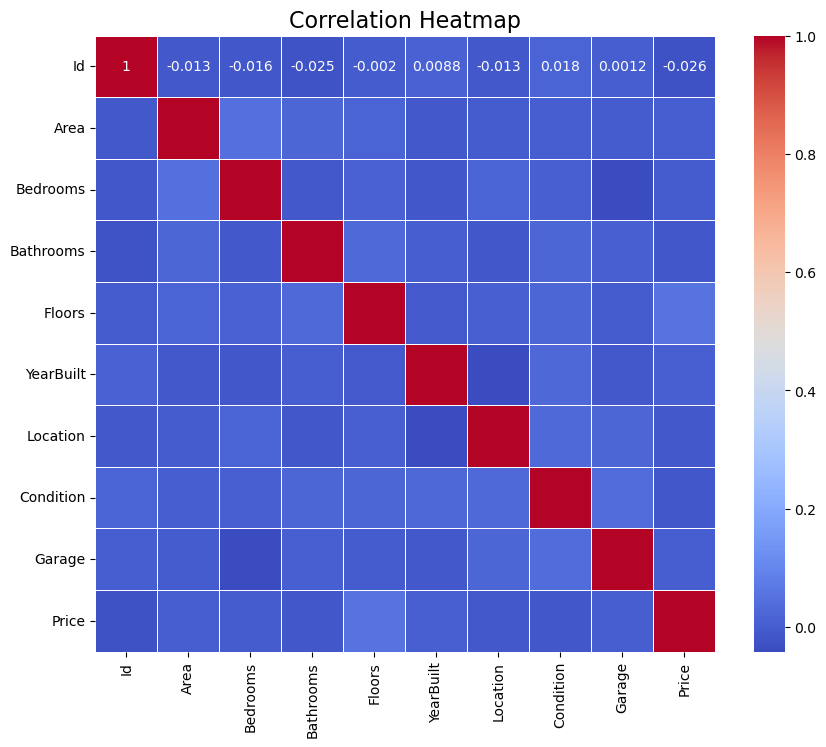

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, color='black')
plt.show()


In [50]:
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (2000, 9)
Shape of y: (2000,)


In [51]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [55]:
Lasso_test = Lasso ()
Lasso_test.fit(X_train_scaled,y_train)
Lasso_test.score(X_test_scaled,y_test)*100 ,Lasso_test.score(x_train,y_train)*100

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


(-0.5108949921593275, -81211.56831619106)

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline



cv = KFold(n_splits=5, shuffle=True, random_state=42)


models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso', Lasso(alpha=0.1)),
    ('Ridge', Ridge(alpha=1.0)),
    ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('SVR', SVR(kernel='rbf', C=100)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Random Forest', RandomForestRegressor(random_state=42, n_estimators=100))
]

# Create a list of (name, model)
model_names = []
mean_mae_scores = []
mean_r2_scores = []

print("\n--- Cross-Validated Model Performance ---")
for name, model in models:
    if name in ['Decision Tree', 'Random Forest']:
        pipeline = model
    else:
        pipeline = make_pipeline(StandardScaler(), model)
    
    mae_scores = -cross_val_score(
        pipeline, x, y, cv=cv, scoring='neg_mean_absolute_error'
    )
    mean_mae = np.mean(mae_scores)
    
    r2_scores = cross_val_score(
        pipeline, x, y, cv=cv, scoring='r2'
    )
    mean_r2 = np.mean(r2_scores)
    
    # Store
    model_names.append(name)
    mean_mae_scores.append(mean_mae)
    mean_r2_scores.append(mean_r2)
    
    print(f"{name}: Mean MAE = {mean_mae:.2f}, Mean R2 = {mean_r2:.2f}")





--- Cross-Validated Model Performance ---
Linear Regression: Mean MAE = 239722.12, Mean R2 = -0.01
Lasso: Mean MAE = 239722.11, Mean R2 = -0.01
Ridge: Mean MAE = 239721.50, Mean R2 = -0.01
ElasticNet: Mean MAE = 239675.69, Mean R2 = -0.01
Decision Tree: Mean MAE = 319947.06, Mean R2 = -1.04
SVR: Mean MAE = 239185.81, Mean R2 = -0.00
KNN: Mean MAE = 257629.36, Mean R2 = -0.21
Random Forest: Mean MAE = 244764.25, Mean R2 = -0.07


In [57]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean MAE': mean_mae_scores,
    'Mean R2': mean_r2_scores
}).sort_values(by='Mean MAE')

print("\n--- Cross-Validation Results ---")
print(results_df)



--- Cross-Validation Results ---
               Model       Mean MAE   Mean R2
5                SVR  239185.807120 -0.003696
3         ElasticNet  239675.689204 -0.008855
2              Ridge  239721.498451 -0.009342
1              Lasso  239722.110914 -0.009348
0  Linear Regression  239722.119583 -0.009348
7      Random Forest  244764.250235 -0.070317
6                KNN  257629.359300 -0.211875
4      Decision Tree  319947.057000 -1.039848


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


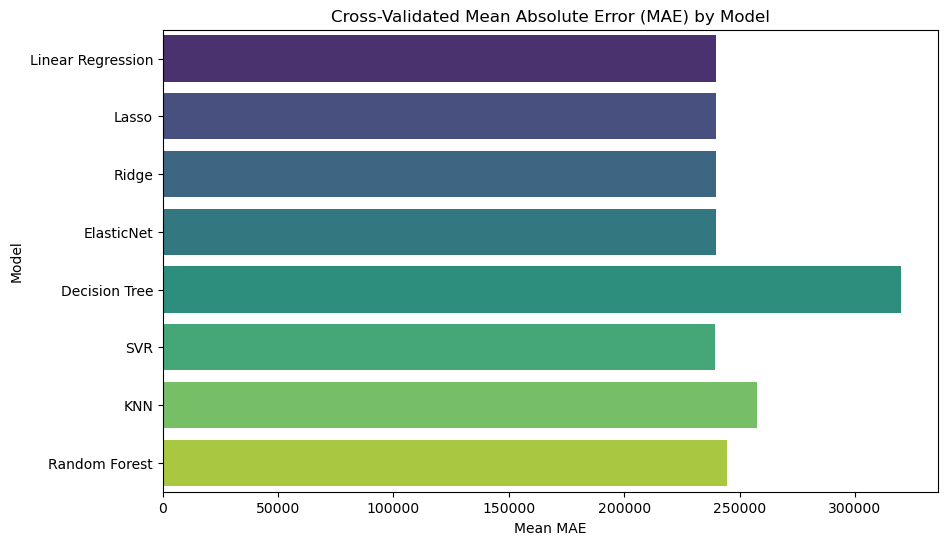

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


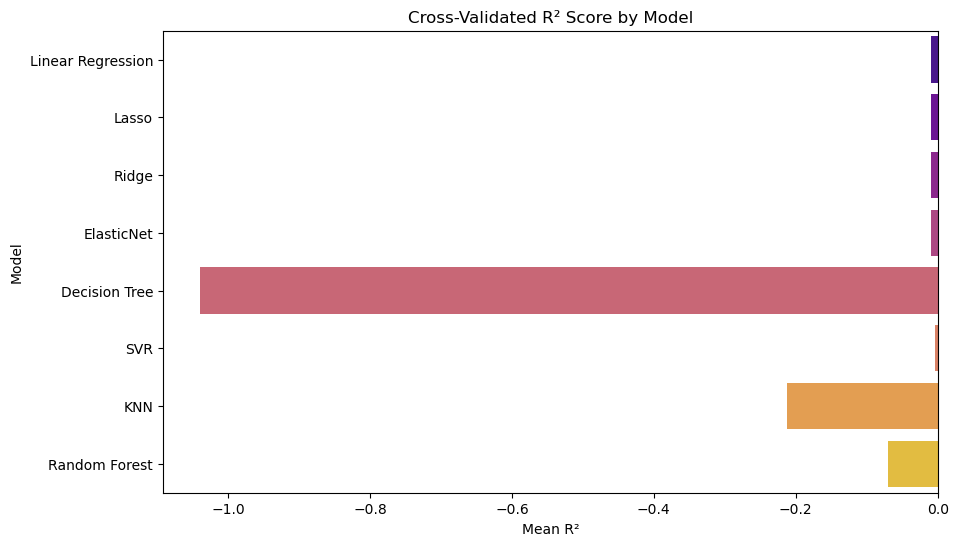

In [58]:

plt.figure(figsize=(10,6))
sns.barplot(x=mean_mae_scores, y=model_names, palette='viridis')
plt.title('Cross-Validated Mean Absolute Error (MAE) by Model')
plt.xlabel('Mean MAE')
plt.ylabel('Model')
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x=mean_r2_scores, y=model_names, palette='plasma')
plt.title('Cross-Validated R² Score by Model')
plt.xlabel('Mean R²')
plt.ylabel('Model')
plt.show()
